## II. Modeling Competence 
In this section, we’ll learn how to analyze systems of differential equations, by looking at the bacterial competence circuit that we learned about in class. 

(c) For the following sets of parameters and associated fixed points (k*, s*), determine the stability of the fixed points using what you learned from Problem 1:
•CaseI: ak =0,bk =0.3,bs =3,k0 =0.2,k1 = 1/30,gk =0.01,gs =0.01,at
• Case II: ak = 0.504,bk = 0.3,bs = 3,k0 = 0.2,k1 = 1 ,gk = 0.01,gs = 0.01, at
k∗ = 0.0420, s∗ = 2.38.
k∗ =3.40, s∗ =1.54·10−7.
• Case III: ak = 0.00035,bk = 0.3,bs = 3,k0 = 0.2,k1 = 1 ,gk = 0.1,gs = 0.1, at
k∗ = 0.0028, s∗ = 20.47.


(d) For cases I,II,III with starting initial values indicated below, perform a numerical sim- ulation for the non-dimensional concentrations of ComK and ComS over time, and plot the results. (i.e., using Euler’s method, we recommend timesteps of 0.01). What do you see? How do the results compare with your linear stability analysis?
• Case I: starting at k = 0.04, s = 2.38. • Case II: starting at k = 3,s = 0.1.
• Case III: starting at k = 1, s = 5.

Part c: stability of cases at the provided fixed points:
Case I: tr = 0.180282, det = 0.204923, stability = unstable node/focus
Case II: tr = -0.298319, det = 0.0144847, stability = stable node/focus
Case III: tr = -0.206756, det = 0.0106854, stability = stable node/focus


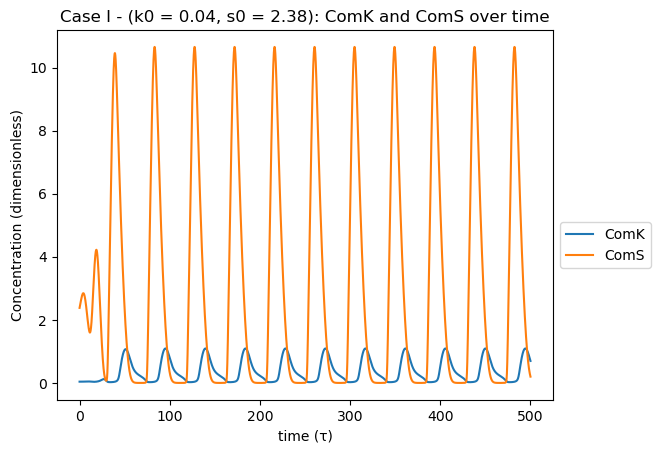

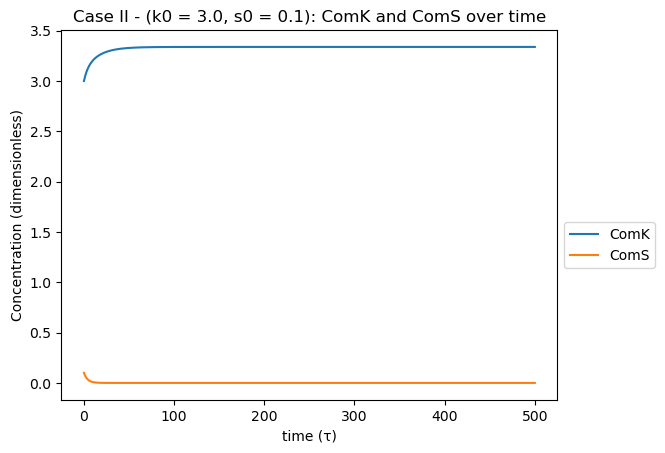

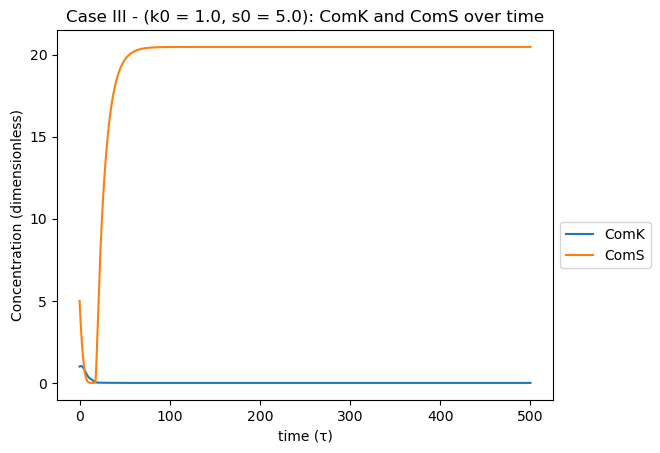

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

# save parameters in a dataclass
@dataclass
class Params:
    ak: float; bk: float; bs: float; k0: float; k1: float; gk: float; gs: float

# functions to compute DEs f1 and f2 describing ComK and ComS dynamics
def f1(k, s, p: Params):
    return p.ak + p.bk*(k**2)/(p.k0**2 + k**2) - k/(1 + k + s) - p.gk*k

def f2(k, s, p: Params):
    return p.bs/(1 + (k/p.k1)**5) - s/(1 + k + s) - p.gs*s

# computes jacobian matrix and stores as 2D np array
def jacobian(k, s, p: Params):
    D = 1 + k + s
    J11 = (2*p.bk*k*(p.k0**2))/((p.k0**2 + k**2)**2) - (1 + s)/(D**2) - p.gk    # df1/dk
    J12 = k/(D**2)                                                              # df1/ds        
    J21 = -(5*p.bs*(k**4)/(p.k1**5))/((1 + (k/p.k1)**5)**2) + s/(D**2)          # df2/dk
    J22 = -(1 + k)/(D**2) - p.gs                                                # df2/ds
    return np.array([[J11, J12],[J21, J22]])

# Euler's method to simulate non-dimensional concentrations of ComK and ComS over time
def euler(p: Params, k0, s0, dt=0.01, T=500):
    n = int(T/dt) # number of time steps
    K = np.zeros(n+1) 
    S = np.zeros(n+1)
    t = np.linspace(0, T, n+1)
    K[0], S[0] = k0, s0 # initialize at time 0
    for i in range(n):
        k, s = K[i], S[i]
        K[i+1] = max(k + dt*f1(k, s, p), 0.0)
        S[i+1] = max(s + dt*f2(k, s, p), 0.0)
    return t, K, S # returns time, ComK, ComS vectors

# cases as (name, params, (k*, s*), (k0, s0))
case_data = [
    ("Case I",   Params(0.0,     0.3, 3.0, 0.2, 1/30, 0.01, 0.01),  (0.0420, 2.38),    (0.04, 2.38)),
    ("Case II",  Params(0.504,   0.3, 3.0, 0.2, 1/30, 0.01, 0.01),  (3.40,   1.54e-7), (3.0,  0.1)),
    ("Case III", Params(0.00035, 0.3, 3.0, 0.2, 1/30, 0.1,  0.1),   (0.0028, 20.47),   (1.0,  5.0)),
]

# Part c: determine stability based on trace and determinant of Jacobian at fixed points
def stability(tr, det):
    if det < 0:
        return "saddle"
    elif det > 0 and tr < 0:
        return "stable"
    elif det > 0 and tr > 0:
        return "unstable"

print("Part c: stability of cases at the provided fixed points:")
for name, p, (k_star, s_star), _ in case_data:
    J = jacobian(k_star, s_star, p)
    tr = float(np.trace(J))
    det = float(np.linalg.det(J))
    stability_type = stability(tr, det)
    print(f"{name}: tr = {tr:.6g}, det = {det:.6g}, stability = {stability_type}")

# Part d: Euler simulatations and plot time series of ComK and ComS
for name, p, _, (k0, s0) in case_data:
    t, K, S = euler(p, k0, s0, dt=0.01, T=500.0) 

    plt.figure()
    plt.plot(t, K)
    plt.plot(t, S)
    plt.xlabel("time (τ)"); plt.ylabel("Concentration (dimensionless)")
    plt.title(f"{name} - (k0 = {k0}, s0 = {s0}): ComK and ComS over time")
    plt.legend(["ComK", "ComS"], bbox_to_anchor=(1.0, 0.5), loc='upper left')
    plt.show()



(d) Case I: The trajectory quickly leaves the fixed point and settles onto a cycle: large, periodic spikes in ComS with smaller, lagged pulses in ComK of roughly constant amplitude and period.
The fixed point is an unstable spiral, and the nonlinear dynamics capture the trajectory into a periodic orbit leading to sustained oscillations.

Case II: ComS quickly drops and stays near zero; ComK rises toward its fixed-point value and settles. This matches the behavior of a stable node.

Case III: In the beginning, a decrease in ComS leads to a decrease in ComK, again leading to a increase in ComS; ComK stays low and ComS stays high. This is again consistent with a stable node under the stronger degradation (gk=gs=0.1).


(e) In Case III, the deterministic dynamics converge to a stable state with low ComK and high ComS. Starting from ComK = 1, ComK falls below the competence threshold and stays low because ComS-mediated degradation keeps it suppressed. Therefore, transient competence (high ComK) observed in cells must come from stochastic fluctuations rather than a deterministic transition.


## III. Stochastic Simulations 

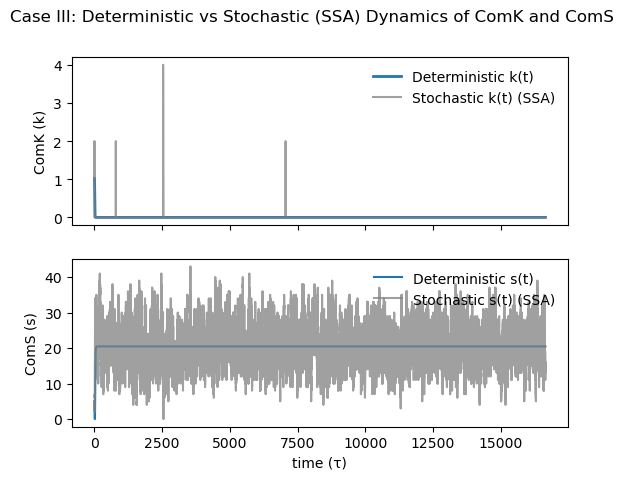

In [68]:
# returns non-negative propensities for birth/death reactions of ComK and ComS
def rates(k: int, s: int, p: Params):
    k_plus  = p.ak + p.bk * (k**2) / (p.k0**2 + k**2)
    k_minus = (k / (1 + k + s)) + p.gk * k
    s_plus  = p.bs / (1 + (k / p.k1)**5)
    s_minus = (s / (1 + k + s)) + p.gs * s
    # ensures non-negative propensities
    a0 = max(k_plus, 0.0)
    a1 = max(k_minus if k > 0 else 0.0, 0.0)
    a2 = max(s_plus, 0.0)
    a3 = max(s_minus if s > 0 else 0.0, 0.0)
    return a0, a1, a2, a3

# Gillespie stochastic simulation algorithm (SSA)
def gillespie_ssa(p: Params, k0: int, s0: int, nsteps=int):
    # (i) initialize system with k0 ComK and s0 ComS molecules, at time t = 0
    t = 0.0; k = int(k0); s = int(s0)
    T = [t]; K = [k]; S = [s]

    for _ in range(nsteps):
        # (ii) compute rates a = {k(+), k(-), s(+), s(-)}
        a = rates(k, s, p)

        # (iii) Sum the rates to obtain the scaling constant Σ = k(+) + k(−) + s(+) + s(−)
        sigma = np.sum(a)

        # (iv) weighted choice over {K+, K-, S+, S-}
        j = np.random.choice(4, p=a / sigma)

        # (v) update state according to chosen reaction
        if j == 0:         # K+
            k += 1
        elif j == 1:       # K-
            if k == 0:     # guard against -comK molecules (rates already zeroed at k=0, but be safe)
                continue
            k -= 1
        elif j == 2:       # S+
            s += 1
        else:              # S-
            if s == 0:
                continue
            s -= 1

        # (v) update time: dt ~ Exp(Sigma) has mean 1/Sigma
        dt = np.random.exponential(1.0 / sigma)
        t += dt 

        # append 
        T.append(t); K.append(k); S.append(s)
    return np.array(T), np.array(K), np.array(S)

# run for case III
caseIII = Params(ak=0.00035, bk=0.3, bs=3.0, k0=0.2, k1=1/30, gk=0.1, gs=0.1)

# initial state 
k0, s0 = 1, 5

# run gillepsie SSA starting from (k0, s0) = (1, 5) for 100,000 steps
T_sim, K_sim, S_sim = gillespie_ssa(caseIII, k0=k0, s0=s0, nsteps=100000) # 100000 nsteps

# also run Euler for deterministic comparison
t_det, K_det, S_det = euler(caseIII, k0=k0, s0=s0, dt=0.01, T=T_sim[-1]) # match time duration of SSA


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, height_ratios=[1,1])
# Top: ComK
ax1.plot(t_det, K_det, linewidth=2, label="Deterministic k(t)")
ax1.plot(T_sim, K_sim, alpha=0.75, label="Stochastic k(t) (SSA)", color="0.5")
ax1.set_ylabel("ComK (k)")
ax1.legend(frameon=False, loc="upper right")
# Bottom: ComS
ax2.plot(t_det, S_det, label="Deterministic s(t)")
ax2.plot(T_sim, S_sim, alpha=0.75, label="Stochastic s(t) (SSA)", color="0.5")
ax2.set_xlabel("time (τ)")
ax2.set_ylabel("ComS (s)")
ax2.legend(frameon=False, loc="upper right")
plt.suptitle("Case III: Deterministic vs Stochastic (SSA) Dynamics of ComK and ComS")
plt.show()


# for 3d
# plot histogram of ditribution of weights
# hist of weight choices. 


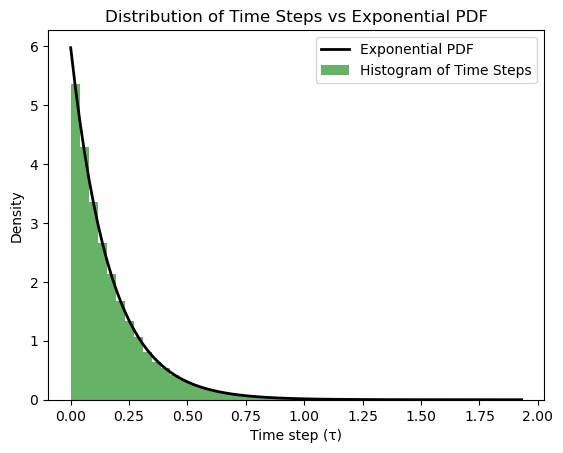

1000.01


In [ ]:
#3(d) Verify Gillespie runs as it should

#(i) plot timesteps in the algorithm to show they are consistent with 
# an exponential distribution  

# taus all T_sim[n+1] - T_sim[n]
taus = np.diff(T_sim)
lmbda = 1/np.mean(taus)

x = np.linspace(0, max(taus), 100)
exp_pdf = lmbda * np.exp(-lmbda * x)

plt.hist(taus, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, exp_pdf, color='k', linewidth=2)
plt.xlabel('Time step (τ)')
plt.ylabel('Density')
plt.title('Distribution of Time Steps vs Exponential PDF')
plt.legend(['Exponential PDF', 'Histogram of Time Steps'])
plt.show()

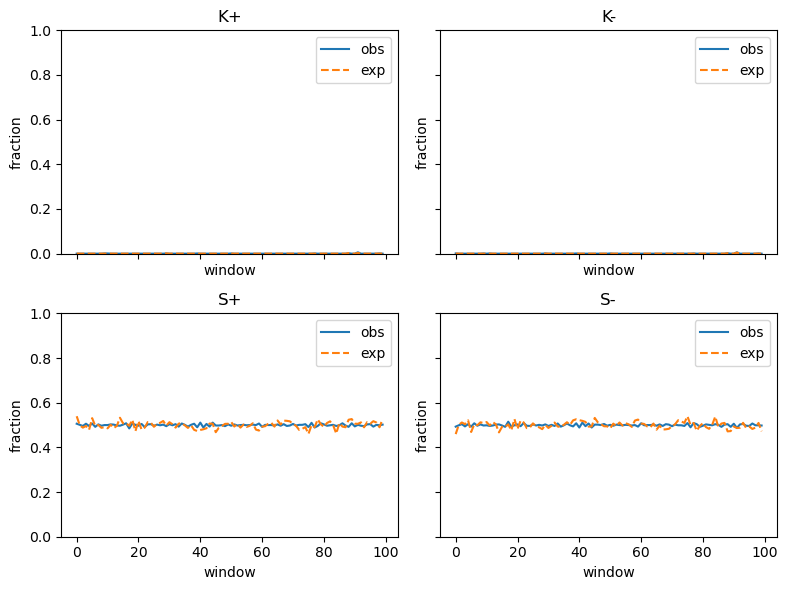

In [ ]:
# 3(d) contd

#(ii) show that the choice of reaction is correct and weighted correctly
'''
We can track the observed fractions of each reaction and compare it to 
the expected fractions based on the propensities in small time windows.
it's not a perfect test, but it should give us more confidence that the
reactions are being chosen according to their weights.
'''
# define window size (100 windows over the entire simulation time)
n_windows = 100
window = int(len(T_sim) / n_windows)

# initialize arrays to store observed and expected fractions
observed_fractions = np.zeros((n_windows, 4)) # 100 windows, 4 reactions k+, k-, s+, s- 
expected_fractions = np.zeros((n_windows, 4)) 

taus = np.diff(T_sim)
dk   = np.diff(K_sim)
ds   = np.diff(S_sim)

# store propensities A at each step a_k+, a_k-, a_s+, a_s- over steps
A = np.zeros((len(K_sim) - 1, 4), dtype=float)

# loop over all steps - last one (no rxn)
for i in range(len(K_sim) - 1):
    k_i = int(K_sim[i])     # ComK count before jump i
    s_i = int(S_sim[i])     # ComS count before jump i

    # call your rates() to get propensities at that state
    a_kp, a_km, a_sp, a_sm = rates(k_i, s_i, caseIII)
    A[i, 0], A[i, 1], A[i, 2], A[i, 3] = a_kp, a_km, a_sp, a_sm

# compute total reaction rate per step
tot_rate = A.sum(axis=1)

# reaction index per step: 0 K+, 1 K-, 2 S+, 3 S-
J = np.where(dk==1, 0, np.where(dk==-1, 1, np.where(ds==1, 2, 3)))
# loop over windows to compute observed and expected fractions
for w in range(n_windows):
    start = w * window 
    end = start + window

    # observed counts in window
    counts = np.array([
        np.sum(J[start:end] == 0),
        np.sum(J[start:end] == 1),
        np.sum(J[start:end] == 2),
        np.sum(J[start:end] == 3),
    ], float)

    observed_fractions[w] = counts / counts.sum() # normalize to get fractions

    # expected fractions in window (sum of propensities in time window / sum of total rates in window)
    sum_a_dt = (A[start:end] * taus[start:end, None]).sum(axis=0) # propensities * dt 
    sum_S_dt = (tot_rate[start:end] * taus[start:end]).sum() # total rate * dt
    expected_fractions[w] = sum_a_dt / sum_S_dt

# plot 
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
labels = ["K+", "K-", "S+", "S-"]
x = np.arange(observed_fractions.shape[0])

for j, ax in enumerate(axes.ravel()):
    ax.plot(x, observed_fractions[:, j], label="obs")
    ax.plot(x, expected_fractions[:, j], "--", label="exp")
    ax.set_title(labels[j])
    ax.set_ylim(0, 1)
    ax.set_xlabel("window")
    ax.set_ylabel("fraction")
    ax.legend()

fig.tight_layout()
plt.show()


3(e)

In the deterministic model for case III, ComK and ComS always settles to a low and high steady level respectively, so cells never cross the competence threshold.
With stochasticity introduced in the Gillespsie algorithm, occasional random increases in ComK can briefly kick k above 1 even though the mean field dynamics wouldn’t.
ComS-mediated turnover then drags ComK back down, so these competence events are short and sporadic.
In sum, rare competent episodes arise from transient bursts in ComK due to noise, not from the deterministic flow.